# YOLOv9

This notebook details how the YOLOv9 model was trained 4-folds, benchmarked and evaluated

install necessary libraries

In [ ]:
from google.colab import drive
from pathlib import Path
from ultralytics import YOLO
import shutil
import os
from google.colab import runtime
import torch
from ultralytics.utils.benchmarks import benchmark
import torch
from tqdm import tqdm
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, f1_score
import time
import matplotlib.pyplot as plt
import cv2

Mount google drive to access data stored.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


install Ultralytics framework

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.6/799.6 kB 17.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

initialise yolov3 model

In [ ]:
model = YOLO('yolov9c.yaml')  # building a new model from scratch

Define paths for the k-fold data

In [ ]:
ds_yamls = [
    Path('/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_1/split_1_dataset.yaml'),
    Path('/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_2/split_2_dataset.yaml'),
    Path('/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_3/split_3_dataset.yaml'),
    Path('/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/split_4_dataset.yaml'),
    Path('/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_5/split_5_dataset.yaml')
]

Define number of k-fold splits

In [ ]:
ksplit = 3

training model for 3-folds with early stopping

In [ ]:
results = {}

# Define your additional arguments here
batch = 16
project = "kfold"
epochs = 100
# Define early stopping parameters
early_stopping_params = {
    'patience': 10,  # Number of epochs to wait after last improvement
}

for k in range(ksplit):
    dataset_yaml = ds_yamls[k]
    model.train(data=dataset_yaml, patience=early_stopping_params['patience'], epochs=epochs, batch=batch, project=project)  # include any train arguments
    results[k] = model.metrics  # save output metrics for further analysis

Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.yaml, data=/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_1/split_1_dataset.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=kfold, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

100%|██████████| 755k/755k [00:00<00:00, 118MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 259MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_1/train/labels.cache... 1620 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1620/1620 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_1/train/images/1021-receipt_jpg.rf.b7d25dd0c92d735ced90234a527733ab.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_1/train/images/1152-receipt_jpg.rf.eb0a1740575320d9ad8ff88974618c7e.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_1/val/labels.cache... 406 images, 0 backgrounds, 0 corrupt: 100%|██████████| 406/406 [00:00<?, ?it/s]


Plotting labels to kfold/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to kfold/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/102 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
      1/100      11.3G      2.804      2.637      3.591         34        640: 100%|██████████| 102/102 [02:03<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.02it/s]

                   all        406       1730      0.436     0.0469      0.103     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.3G      1.757      1.543      2.378         38        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        406       1730      0.853      0.679      0.725      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.4G      1.332      1.164        1.9         53        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        406       1730      0.931       0.71      0.754      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.1G      1.122     0.9721      1.653         29        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        406       1730      0.944      0.725      0.779      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.2G          1      0.855      1.531         46        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]


                   all        406       1730      0.932        0.7      0.759      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.2G     0.9362     0.8155      1.474         29        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        406       1730      0.959      0.716      0.767      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.3G     0.9375     0.8067      1.463         46        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        406       1730      0.931      0.769      0.837      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.2G     0.8068     0.6999      1.353         28        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        406       1730      0.965      0.745      0.807      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.2G     0.7993     0.7178      1.341         29        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        406       1730      0.966      0.751      0.848      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.2G     0.7509     0.6602      1.288         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        406       1730      0.974      0.758      0.839      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.2G     0.7239     0.6444      1.278         25        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        406       1730      0.964      0.778      0.867      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.1G     0.7014     0.6131       1.25         53        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        406       1730      0.965      0.779      0.867      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.2G     0.7051     0.6283      1.262         26        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]

                   all        406       1730      0.978      0.769      0.872      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.1G     0.6898     0.6175      1.245         42        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        406       1730      0.946      0.743      0.842      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.2G      0.672     0.5955      1.231         25        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        406       1730      0.975      0.772      0.873      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.1G      0.668     0.5785      1.222         24        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        406       1730      0.972      0.778      0.867      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.2G      0.644     0.5707      1.208         41        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]


                   all        406       1730      0.969      0.787      0.864       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.1G     0.6458     0.5727      1.209         53        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730       0.97      0.809      0.896      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.2G     0.6077       0.53      1.171         39        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        406       1730       0.95        0.8      0.869      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.2G      0.615     0.5348      1.187         42        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        406       1730       0.97      0.804      0.886      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.2G     0.6002     0.5259      1.167         43        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        406       1730      0.974      0.804      0.887      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.1G     0.5773     0.5016      1.156         39        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        406       1730      0.971      0.811      0.887      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.2G     0.5924     0.5158       1.17         41        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        406       1730      0.977      0.809      0.899      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.1G      0.578     0.5078       1.16         39        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        406       1730      0.982      0.784      0.872      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.2G     0.5892     0.5176      1.165         32        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        406       1730      0.977      0.806      0.894      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.1G     0.5667     0.5068      1.145         51        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        406       1730      0.974      0.809      0.886      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.3G     0.5469     0.4703      1.124         26        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730      0.976       0.82      0.892      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.2G     0.5395     0.4549      1.121         48        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]

                   all        406       1730      0.974      0.824        0.9      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.2G     0.5234     0.4562      1.114         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]

                   all        406       1730      0.983      0.811      0.887      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.1G     0.5382     0.4715       1.12         29        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        406       1730      0.977      0.819      0.897      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.2G     0.5475     0.4791      1.136         26        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]

                   all        406       1730      0.976      0.808      0.888        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.2G     0.5315     0.4626      1.122         21        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.07it/s]

                   all        406       1730      0.965      0.831      0.903      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.2G     0.5258     0.4639      1.122         40        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]

                   all        406       1730      0.954      0.801      0.871      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.2G     0.5165     0.4462      1.109         22        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]

                   all        406       1730      0.981      0.805      0.898      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.2G     0.5241     0.4475      1.109         36        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        406       1730      0.985      0.804      0.899      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.2G     0.5296     0.4511      1.115         43        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        406       1730      0.971      0.829      0.904      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.2G     0.5023     0.4363      1.094         38        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        406       1730      0.985      0.818      0.905      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.1G     0.4996     0.4197      1.083         43        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]


                   all        406       1730      0.979      0.828      0.899      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.2G     0.5065     0.4372      1.098         30        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        406       1730      0.952      0.826      0.899      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.2G     0.5269     0.4689      1.129         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730      0.975      0.831      0.911      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.2G     0.4857     0.4137      1.085         44        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        406       1730       0.98      0.829      0.902      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.1G     0.4902     0.4217      1.088         28        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730      0.962      0.831      0.903      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.2G     0.4886     0.4136      1.087         34        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        406       1730      0.972       0.83      0.908      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.1G     0.4684     0.4006      1.068         38        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        406       1730      0.982      0.832      0.919      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.2G     0.4969     0.4201      1.092         39        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        406       1730      0.977       0.83      0.915      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.2G       0.47     0.4017      1.066         28        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        406       1730      0.978      0.825      0.904      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.2G     0.4714     0.4056      1.067         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        406       1730      0.958      0.821        0.9      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.1G     0.4772       0.41      1.078         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        406       1730      0.988      0.833      0.922       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.2G     0.4811      0.418       1.08         26        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        406       1730      0.984      0.819      0.913      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.1G     0.4681     0.4018      1.076         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730      0.984      0.831      0.913       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.2G     0.4684     0.4036      1.067         37        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]

                   all        406       1730      0.985      0.832      0.922      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.1G      0.464     0.3935      1.068         30        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        406       1730      0.969      0.818      0.904      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.2G     0.4548     0.3879      1.058         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        406       1730      0.982      0.836      0.918      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.1G     0.4535      0.388      1.063         41        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730      0.975      0.837      0.917      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.2G      0.466      0.394      1.068         37        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730      0.982      0.835      0.917      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.2G     0.4375     0.3789      1.049         22        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        406       1730      0.977      0.838      0.923      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.2G     0.4467     0.3825      1.051         15        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        406       1730      0.988       0.84      0.929      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.1G     0.4484     0.3847      1.055         42        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]

                   all        406       1730      0.975      0.836       0.92      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.2G      0.425     0.3578      1.035         39        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]

                   all        406       1730      0.985      0.839      0.929      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.2G      0.443     0.3757      1.049         53        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        406       1730      0.988      0.838      0.924      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.2G     0.4183     0.3548      1.026         46        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]

                   all        406       1730       0.98      0.841      0.924       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.2G     0.4279     0.3609      1.037         26        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]

                   all        406       1730      0.984      0.842      0.922      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.2G     0.4164     0.3563      1.032         40        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]

                   all        406       1730      0.967      0.837      0.916      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.1G     0.4156     0.3465      1.024         41        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]

                   all        406       1730      0.993      0.832      0.934      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.2G     0.4325     0.3726      1.044         42        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]

                   all        406       1730      0.981       0.84      0.927      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.2G     0.4315     0.3661      1.044         36        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.10it/s]

                   all        406       1730      0.982      0.842      0.923      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.2G     0.4184     0.3555      1.038         22        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]

                   all        406       1730      0.993      0.839      0.929      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.1G     0.4162     0.3478      1.031         30        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]

                   all        406       1730      0.947       0.83      0.911       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.2G     0.4201     0.3522      1.032         52        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        406       1730      0.985       0.84      0.933      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.1G     0.4122     0.3552      1.033         21        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        406       1730      0.984      0.841      0.931      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.2G     0.4087     0.3427      1.023         38        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        406       1730      0.988      0.844      0.937      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.2G     0.4204     0.3588      1.038         24        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        406       1730       0.99      0.845      0.936      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.3G     0.4015     0.3357      1.022         31        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730      0.985       0.84      0.935      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.1G     0.3859     0.3221      1.008         27        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730      0.974      0.838      0.926      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.2G     0.4003     0.3409      1.024         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        406       1730      0.931      0.836      0.907      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.1G     0.3812     0.3161      1.006         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        406       1730      0.993      0.841      0.933      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.3G     0.4019      0.335       1.02         27        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        406       1730      0.991      0.839      0.933      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.1G     0.3878     0.3241      1.016         35        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        406       1730      0.987       0.84      0.934      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.2G     0.4044     0.3414      1.024         38        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730      0.991      0.844      0.936      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.2G     0.3908     0.3271       1.01         33        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730      0.985      0.852      0.941      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.2G     0.3696     0.3057     0.9906         29        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        406       1730      0.987      0.844      0.936      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.1G     0.3727     0.3107      1.005         35        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]

                   all        406       1730      0.986      0.841      0.937      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.2G     0.3717     0.3117          1         29        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]

                   all        406       1730      0.992      0.845      0.942      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.2G     0.3757     0.3153      1.007         46        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]

                   all        406       1730      0.993      0.843      0.944      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.2G     0.3857      0.322      1.009         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]

                   all        406       1730      0.977      0.838      0.936       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.2G     0.3697     0.3101     0.9986         38        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]

                   all        406       1730       0.99      0.843      0.945      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.2G     0.3655     0.3023     0.9928         27        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]

                   all        406       1730      0.986      0.846      0.943      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.2G     0.3665     0.3041     0.9981         33        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]

                   all        406       1730      0.984      0.849      0.946      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.2G     0.3642     0.3037     0.9991         34        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]

                   all        406       1730      0.988      0.843      0.941      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.1G     0.3717     0.3058      1.001         26        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.07it/s]

                   all        406       1730      0.977      0.839      0.931      0.872


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.2G      0.332     0.2779     0.9712         15        640: 100%|██████████| 102/102 [00:50<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        406       1730      0.974       0.86      0.945      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.2G     0.3208     0.2664      0.962         15        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        406       1730      0.962      0.865      0.943      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.2G     0.3202     0.2652       0.96         16        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        406       1730      0.993      0.842      0.945      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.1G     0.3182     0.2668      0.965         16        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        406       1730      0.994      0.843      0.948      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.2G     0.3092     0.2507     0.9472         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        406       1730      0.988      0.845      0.947      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.1G     0.3091     0.2515      0.948         26        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        406       1730      0.989      0.845      0.949      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.2G      0.307     0.2503      0.954         16        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730      0.964      0.868      0.947      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.1G     0.2975     0.2437     0.9444         22        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        406       1730      0.967      0.866      0.949      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.2G     0.2968     0.2366     0.9408         16        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        406       1730      0.965      0.866      0.948      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.1G     0.2974     0.2412     0.9409         16        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        406       1730      0.968      0.863      0.948      0.883



100 epochs completed in 1.517 hours.
Optimizer stripped from kfold/train/weights/last.pt, 51.6MB
Optimizer stripped from kfold/train/weights/best.pt, 51.6MB

Validating kfold/train/weights/best.pt...
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.28it/s]


                   all        406       1730      0.965      0.866      0.948      0.883
Speed: 0.2ms preprocess, 6.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to kfold/train
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.yaml, data=/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_2/split_2_dataset.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=kfold, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, pl

train: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_2/train/labels.cache... 1621 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1621/1621 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_2/train/images/1021-receipt_jpg.rf.b7d25dd0c92d735ced90234a527733ab.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_2/train/images/1152-receipt_jpg.rf.eb0a1740575320d9ad8ff88974618c7e.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_2/val/labels.cache... 405 images, 1 backgrounds, 0 corrupt: 100%|██████████| 405/405 [00:00<?, ?it/s]


Plotting labels to kfold/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to kfold/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.2G      2.778      2.991      3.741         72        640:  99%|█████████▉| 101/102 [01:10<00:00,  2.07it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
      1/100      11.3G      2.779      2.994      3.737         11        640: 100%|██████████| 102/102 [01:11<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.31it/s]

                   all        405       1693     0.0586      0.145     0.0544     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.3G      1.974      1.965      2.641         21        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]


                   all        405       1693      0.461      0.624      0.493      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.4G      1.528      1.407      2.136         14        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]


                   all        405       1693      0.902      0.725      0.783      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.2G       1.27      1.155      1.849         28        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1693      0.877      0.723      0.791      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.3G      1.162      1.048      1.711         34        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]

                   all        405       1693      0.877      0.724      0.787      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.2G      1.056     0.9536      1.603         21        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1693      0.877       0.73      0.817      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.3G      0.988     0.8894      1.531         25        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.83it/s]


                   all        405       1693      0.844      0.735      0.792      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.2G     0.9135      0.855      1.465         10        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1693      0.953      0.762       0.83       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.3G     0.9029     0.8041       1.44         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]

                   all        405       1693       0.95      0.778      0.855       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.2G     0.8712     0.7774      1.401         28        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1693      0.963      0.769      0.868      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.3G     0.8377     0.7567      1.379         24        640: 100%|██████████| 102/102 [00:47<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1693       0.95      0.784      0.862      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.2G      0.801     0.7154      1.348         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1693      0.965        0.8      0.885      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.3G     0.7984     0.7061      1.338         29        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]

                   all        405       1693      0.963      0.794      0.871      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.2G     0.7781     0.6914       1.32         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1693      0.966      0.795      0.879      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.3G     0.7493     0.6572      1.287         15        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1693      0.964      0.809      0.893       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.2G     0.7201     0.6469      1.268         13        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1693       0.96        0.8      0.889      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.2G     0.7131     0.6418      1.254         26        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1693      0.976      0.783      0.855      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.2G     0.6784     0.6172      1.236         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1693       0.95      0.825       0.89      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.2G     0.6715     0.6058      1.222         29        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        405       1693      0.952      0.823      0.899      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.2G     0.6721     0.6026      1.222         10        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        405       1693      0.971       0.82      0.903      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.3G     0.6689     0.5896      1.225         21        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1693      0.953      0.804      0.895      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.2G     0.6572     0.5736      1.212         27        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]

                   all        405       1693      0.968       0.82      0.901      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.3G     0.6343     0.5713      1.191         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1693      0.965      0.828      0.891      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.2G     0.6324     0.5692      1.194         35        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]


                   all        405       1693      0.964      0.811      0.886      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.3G     0.6392     0.5604      1.187         16        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1693      0.958      0.831      0.902      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.2G     0.6223     0.5414      1.181         25        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1693      0.967      0.837      0.909      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.3G     0.6086     0.5266      1.167         15        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        405       1693      0.969      0.836      0.913      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.2G     0.5948     0.5347      1.161         16        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1693      0.969      0.823      0.906      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.3G       0.58     0.5191      1.155         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1693      0.952      0.849      0.915      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.2G     0.5822     0.5016      1.144         21        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1693      0.963      0.835      0.909      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.3G     0.5715     0.5043      1.135         28        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]

                   all        405       1693      0.974      0.812       0.89      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.2G     0.5655     0.4915      1.138         16        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1693      0.967      0.835      0.914      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.3G     0.5713     0.5177       1.14         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]


                   all        405       1693      0.958      0.849      0.916       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.2G     0.5437     0.4888      1.119         33        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1693      0.976      0.828      0.912       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.2G     0.5522     0.4831      1.134         21        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]

                   all        405       1693      0.971      0.852      0.923      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.2G     0.5417     0.4731      1.116         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1693      0.977      0.841       0.92      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.2G     0.5368     0.4754      1.116         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]

                   all        405       1693      0.963      0.838       0.92      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.2G     0.5388      0.467      1.115         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        405       1693      0.949      0.844      0.917      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.2G     0.5297     0.4644      1.102         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1693       0.97      0.849       0.92      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.2G     0.5291     0.4722      1.108         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1693      0.968      0.832      0.912      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.3G     0.5258      0.457        1.1         27        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1693      0.962      0.848      0.917      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.2G     0.5102     0.4611      1.093         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1693      0.986      0.833      0.914      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.3G      0.507     0.4463      1.095         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1693      0.984      0.846      0.921      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.2G     0.5144     0.4391      1.088         30        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1693      0.975       0.85      0.928      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.2G     0.5026     0.4428      1.087         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        405       1693      0.982      0.843      0.922       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.2G        0.5     0.4424      1.087         22        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]

                   all        405       1693       0.98      0.853      0.929      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.3G     0.4965     0.4323      1.083         22        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1693      0.983      0.846       0.93      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.2G     0.4866     0.4238      1.068         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1693      0.975      0.856       0.93      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.3G     0.4872     0.4223       1.07         24        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1693      0.988      0.845      0.933      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.2G     0.4764     0.4152      1.067         12        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1693      0.972      0.856       0.93      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.3G     0.4742     0.4063       1.06         21        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1693      0.985      0.848       0.93      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.2G     0.4786     0.4183      1.062         28        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1693      0.971      0.856      0.931      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.3G     0.4687      0.411       1.06         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        405       1693      0.981      0.858      0.935      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.2G     0.4701     0.4077      1.058         29        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1693      0.983      0.858      0.936      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.3G     0.4629     0.4031       1.06         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]

                   all        405       1693      0.981       0.86      0.934      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.2G     0.4557     0.3984      1.055         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1693      0.984      0.859      0.934      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.3G     0.4581     0.3926      1.053         32        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]


                   all        405       1693       0.98      0.841      0.926      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.2G     0.4614     0.4026      1.057         29        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1693      0.974      0.856      0.931      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.3G     0.4609     0.4031      1.055         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1693      0.984      0.851      0.932      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.2G     0.4497     0.3884      1.042         14        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1693      0.975      0.861      0.935      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.3G     0.4478     0.3885      1.044         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1693      0.977      0.865      0.939      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.2G     0.4403     0.3839      1.036         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]


                   all        405       1693      0.978      0.856      0.931       0.86

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.3G     0.4367     0.3754      1.031         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1693      0.985      0.857       0.94      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.2G     0.4391     0.3791      1.039         27        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1693      0.977      0.861      0.936      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.3G      0.435     0.3693      1.033         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1693      0.978      0.864      0.941      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.2G     0.4275     0.3651      1.022         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1693      0.981      0.859      0.935      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.3G     0.4218     0.3579      1.019         21        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        405       1693      0.972      0.867      0.938      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.2G     0.4283       0.37      1.028         28        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1693      0.984      0.858      0.941      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.3G     0.4217     0.3651      1.019         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        405       1693      0.985      0.862      0.945      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.2G     0.4168      0.356      1.017         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1693       0.98      0.864      0.945      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.3G      0.416     0.3513      1.015         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1693      0.984      0.862      0.945      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.2G     0.4225     0.3761      1.026         26        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1693      0.982      0.862      0.943      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.3G      0.411       0.35       1.01         12        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]

                   all        405       1693      0.988      0.855      0.943      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.2G     0.4002     0.3433      1.002         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1693      0.976      0.863      0.944      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.3G      0.406     0.3438      1.005         10        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1693      0.989      0.865      0.941      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.2G     0.3967     0.3467      1.005         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1693      0.977      0.869      0.947      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.3G      0.393     0.3348     0.9978         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1693      0.991      0.858      0.946      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.2G     0.4048     0.3421      1.008         35        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1693      0.984      0.859      0.942      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.2G     0.3949      0.343      1.002         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1693      0.981      0.871      0.952      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.2G     0.3857     0.3308      0.993         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1693      0.985       0.86      0.948      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.3G     0.3901     0.3307          1         24        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1693      0.988      0.871      0.951      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.2G     0.3843     0.3238     0.9965         13        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]


                   all        405       1693      0.975      0.874       0.95      0.888

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.3G      0.376     0.3138     0.9869         21        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1693      0.983      0.866       0.95       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.2G     0.3731     0.3157     0.9887         27        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]

                   all        405       1693      0.981      0.866      0.947      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.3G     0.3786     0.3218     0.9913         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1693      0.977      0.867      0.948      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.2G     0.3673     0.3131     0.9826         15        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        405       1693      0.982      0.872       0.95      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.3G      0.362     0.3053     0.9817         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        405       1693      0.978      0.868      0.949      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.2G     0.3683     0.3059     0.9816         32        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1693      0.987      0.864      0.951       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.3G      0.358     0.3024     0.9772         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1693      0.976      0.872      0.951      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.2G     0.3545     0.2943     0.9747         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1693      0.978       0.88      0.955      0.894


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.3G     0.3619     0.3038     0.9788         34        640: 100%|██████████| 102/102 [00:50<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]


                   all        405       1693      0.967      0.884      0.954      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.2G     0.3516     0.2943      0.975         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1693      0.973      0.882      0.954      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.3G     0.3499      0.291     0.9706         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]

                   all        405       1693      0.982      0.872      0.954      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.2G     0.3476     0.2883     0.9686         14        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1693      0.977      0.875      0.954      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.3G     0.3443     0.2829     0.9681         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1693      0.972      0.882      0.955      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.2G      0.344     0.2845     0.9638         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1693      0.968      0.886      0.955      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.3G     0.3419     0.2829     0.9611         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1693      0.975      0.877      0.954      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.2G     0.3395     0.2842      0.969         30        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1693      0.968      0.883      0.954      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.3G     0.3342      0.274     0.9606         15        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1693      0.973      0.883      0.955      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.2G     0.3377     0.2776     0.9691         25        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        405       1693      0.971      0.883      0.954      0.899



100 epochs completed in 1.512 hours.
Optimizer stripped from kfold/train2/weights/last.pt, 51.6MB
Optimizer stripped from kfold/train2/weights/best.pt, 51.6MB

Validating kfold/train2/weights/best.pt...
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]


                   all        405       1693      0.973      0.883      0.955      0.899
Speed: 0.1ms preprocess, 7.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to kfold/train2
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.yaml, data=/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_3/split_3_dataset.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=kfold, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, 

train: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_3/train/labels.cache... 1621 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1621/1621 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_3/val/labels.cache... 405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 405/405 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_3/val/images/1021-receipt_jpg.rf.b7d25dd0c92d735ced90234a527733ab.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_3/val/images/1152-receipt_jpg.rf.eb0a1740575320d9ad8ff88974618c7e.jpg: 1 duplicate labels removed


Plotting labels to kfold/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to kfold/train22
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.3G      2.777       2.99      3.748         18        640: 100%|██████████| 102/102 [01:33<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 2/13 [00:00<00:03,  3.37it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]

                   all        405       1684      0.113     0.0843     0.0445      0.011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.3G      1.877      1.828      2.583         20        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]


                   all        405       1684      0.793      0.662      0.733      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.1G      1.433      1.347      2.083         16        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1684      0.742      0.667        0.7       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.2G      1.238      1.126      1.831         28        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1684      0.917      0.752      0.822      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.2G      1.115      1.033      1.691         35        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1684      0.876      0.696      0.771      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.2G     0.9964     0.9365      1.566         13        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]


                   all        405       1684      0.877      0.748      0.827      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.3G     0.9554     0.8593      1.506         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]


                   all        405       1684      0.943      0.782       0.88      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.2G     0.9148     0.8273       1.47         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]

                   all        405       1684      0.966      0.794      0.878      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.2G     0.8853     0.7894      1.438         26        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1684      0.968      0.808      0.887      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.2G     0.8314     0.7585      1.382         33        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1684      0.954      0.795       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.3G     0.8006     0.7241      1.351         25        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1684      0.959      0.812      0.874      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.2G     0.7993     0.7103      1.351         21        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        405       1684      0.972      0.801      0.894      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.3G     0.7861     0.7092      1.339         24        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]

                   all        405       1684      0.961      0.828      0.901      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.2G     0.7611      0.688      1.312         15        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1684       0.96      0.835      0.904      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.3G     0.7271     0.6477       1.28         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        405       1684      0.966      0.806      0.883      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.2G     0.7188     0.6464      1.275         14        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1684      0.965      0.837      0.911      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.3G     0.7079     0.6358      1.267         14        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1684      0.962      0.834      0.909      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.2G     0.6943     0.6229      1.254         13        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1684      0.973      0.839      0.913      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.3G     0.6788     0.6088      1.239         29        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        405       1684       0.96      0.833      0.912      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.2G     0.6761     0.6058      1.226         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1684      0.971      0.845      0.908      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.3G      0.653     0.5851      1.212         16        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        405       1684      0.976      0.831       0.92      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.2G      0.646     0.5729      1.212         24        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1684      0.959      0.852      0.916      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.3G     0.6383     0.5691      1.205         13        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1684       0.97       0.85      0.912       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.2G     0.6257     0.5677      1.203         35        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1684       0.96      0.842      0.912      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.3G     0.6191     0.5555      1.191         14        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        405       1684      0.955      0.831      0.913      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.2G     0.6031     0.5357       1.17         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1684       0.97       0.85      0.924      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.3G     0.6072      0.534      1.171         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        405       1684       0.95      0.862      0.927      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.2G     0.5999      0.538      1.171         29        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1684      0.976      0.847      0.932      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.3G     0.5894     0.5253      1.155         22        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1684      0.972      0.849      0.932      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.2G     0.5891     0.5149      1.156         25        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        405       1684      0.955      0.873      0.935      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.2G      0.562     0.5012      1.135         24        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1684      0.964       0.86      0.929      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.2G     0.5653     0.5058       1.14         15        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1684      0.982      0.859       0.94       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.3G     0.5626     0.5027      1.134         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1684       0.97      0.859      0.925      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.2G     0.5501     0.4888      1.131         36        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        405       1684      0.969      0.864      0.937      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.3G     0.5451     0.4876      1.125         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1684      0.973       0.86      0.939      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.2G     0.5371     0.4734      1.116         16        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        405       1684      0.982      0.866      0.945      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.3G     0.5336     0.4621       1.11         15        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        405       1684      0.974       0.87       0.94       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.2G     0.5369     0.4748      1.123         13        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1684      0.974      0.871      0.938      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.3G     0.5315     0.4719      1.115         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1684       0.97      0.874      0.939      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.2G      0.517     0.4733      1.112         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        405       1684      0.968      0.874      0.944       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.3G     0.5174     0.4466      1.096         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1684      0.973      0.868      0.942      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.2G     0.5229     0.4691      1.104         16        640: 100%|██████████| 102/102 [00:48<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1684      0.981      0.872      0.945      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.3G     0.5136     0.4449      1.095         24        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]

                   all        405       1684      0.985      0.874      0.946      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.2G     0.5046     0.4448      1.087         27        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1684      0.979      0.866      0.943      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.3G     0.4969     0.4401       1.09         19        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1684      0.953      0.895      0.945      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.2G     0.4931     0.4355      1.079         15        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1684      0.972      0.877      0.945      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.3G     0.5017     0.4378      1.089         25        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.85it/s]

                   all        405       1684       0.98      0.868      0.943      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.2G     0.4859     0.4294      1.078         21        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]

                   all        405       1684      0.974      0.878      0.951      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.3G     0.4893      0.429      1.078         16        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]

                   all        405       1684      0.983      0.863      0.942      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.2G     0.4776     0.4184      1.067         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1684      0.984      0.864      0.946      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.3G     0.4849     0.4186      1.069         14        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]

                   all        405       1684      0.982      0.866      0.939      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.2G     0.4859       0.42      1.073         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1684      0.957      0.873      0.946      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.2G     0.4718     0.4121      1.065         28        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1684       0.98      0.863      0.946      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.2G     0.4734     0.4168      1.064         22        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.45it/s]

                   all        405       1684      0.984      0.864      0.934       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.3G     0.4753     0.4121      1.062         23        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        405       1684      0.978      0.883       0.95      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.2G     0.4583     0.4025      1.055         26        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1684      0.983       0.88      0.951      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.3G     0.4531     0.3934      1.046         30        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1684      0.972       0.89      0.952      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.2G     0.4596     0.3998      1.054         22        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1684      0.969        0.9      0.959      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.3G     0.4497     0.3937      1.045         24        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        405       1684      0.976       0.88      0.956      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.2G     0.4431      0.385      1.036         24        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1684      0.981      0.884      0.952      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.2G     0.4346     0.3832      1.029         15        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1684      0.971      0.892      0.956      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.2G     0.4437      0.387      1.042         18        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1684      0.986      0.878      0.953      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.3G     0.4284     0.3796      1.027         27        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        405       1684      0.984      0.881       0.96      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.2G     0.4363      0.376      1.032         24        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        405       1684      0.972      0.887      0.956      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.3G     0.4319     0.3708      1.031         22        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1684      0.976      0.901      0.959      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.2G     0.4322     0.3718      1.033         11        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]

                   all        405       1684      0.971        0.9      0.961      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.3G     0.4187     0.3629      1.015         11        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1684      0.967      0.899      0.957      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.2G     0.4195     0.3586      1.021         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]

                   all        405       1684      0.979      0.894      0.959      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.2G     0.4214     0.3595      1.021         27        640: 100%|██████████| 102/102 [00:49<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1684      0.975      0.893      0.961      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.2G     0.4261     0.3567      1.022         21        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1684      0.982       0.88      0.956      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.3G     0.4058     0.3457      1.006         18        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1684      0.981      0.887      0.959      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.2G     0.4166     0.3566      1.019         31        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1684      0.976      0.888      0.957      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.3G       0.41     0.3506      1.013         17        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]

                   all        405       1684      0.979      0.896      0.958      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.2G     0.4003     0.3465      1.007         10        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1684      0.977      0.898      0.964      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.3G     0.3989     0.3425      1.002         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        405       1684      0.968      0.902      0.959      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.2G     0.3956     0.3325      1.001         17        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1684      0.978      0.909      0.963      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.2G     0.3979     0.3314     0.9996         17        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]

                   all        405       1684      0.976      0.909      0.965      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.2G     0.3989     0.3404      1.004         20        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1684      0.976      0.888      0.962      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.3G     0.3931     0.3355     0.9985         20        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.46it/s]

                   all        405       1684      0.982      0.897       0.96      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.2G     0.3856     0.3269      0.997         17        640: 100%|██████████| 102/102 [00:49<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        405       1684      0.986      0.895      0.966      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.3G     0.3885     0.3271          1         22        640: 100%|██████████| 102/102 [00:50<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1684      0.984      0.903      0.966      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.2G     0.3814     0.3214     0.9895         19        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1684      0.986      0.878      0.953      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.3G     0.3801     0.3209     0.9921         16        640: 100%|██████████| 102/102 [00:48<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]

                   all        405       1684      0.978      0.891      0.958      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.2G      0.377     0.3152     0.9904         26        640: 100%|██████████| 102/102 [00:48<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1684      0.984      0.909      0.965      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.3G     0.3796     0.3223     0.9931         31        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1684      0.983      0.904      0.964      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.2G     0.3751      0.316     0.9878         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1684      0.975      0.907      0.968       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.3G     0.3614     0.3027      0.978         18        640: 100%|██████████| 102/102 [00:49<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        405       1684      0.974      0.906      0.967      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.2G     0.3662     0.3024     0.9795         32        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1684      0.981      0.902      0.965      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.3G      0.359     0.3032     0.9801         18        640: 100%|██████████| 102/102 [00:49<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1684      0.979      0.904      0.965       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.2G     0.3591     0.2985     0.9802         16        640: 100%|██████████| 102/102 [00:49<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.44it/s]

                   all        405       1684      0.981      0.912      0.969      0.912


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.3G     0.3593     0.3027     0.9717         31        640: 100%|██████████| 102/102 [00:49<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1684      0.979      0.917       0.97      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.2G     0.3497     0.2872     0.9685         23        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]

                   all        405       1684      0.979      0.909      0.965      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.3G      0.356     0.2928     0.9674         18        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1684      0.985       0.91      0.969      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.2G     0.3475     0.2895      0.969         23        640: 100%|██████████| 102/102 [00:49<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1684      0.983      0.911       0.97      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.3G     0.3421     0.2817     0.9668         14        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        405       1684      0.978      0.913      0.969      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.2G     0.3415     0.2809     0.9668         20        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]

                   all        405       1684       0.98      0.923      0.971      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.3G     0.3407     0.2833      0.964         33        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]

                   all        405       1684      0.972      0.918      0.969      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.2G     0.3376      0.278     0.9621         21        640: 100%|██████████| 102/102 [00:49<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1684       0.98      0.915       0.97      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.3G     0.3374     0.2777     0.9635         20        640: 100%|██████████| 102/102 [00:48<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]

                   all        405       1684      0.982      0.914       0.97      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.2G     0.3282     0.2723     0.9585         12        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1684       0.98      0.915      0.971      0.915



100 epochs completed in 1.535 hours.
Optimizer stripped from kfold/train22/weights/last.pt, 51.6MB
Optimizer stripped from kfold/train22/weights/best.pt, 51.6MB

Validating kfold/train22/weights/best.pt...
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]


                   all        405       1684       0.98      0.915       0.97      0.918
Speed: 0.1ms preprocess, 6.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to kfold/train22


saving training results to a folder

In [ ]:
#saving best run result

# Source and destination paths
source_folder = '/content/kfold'
destination_folder = '/content/drive/MyDrive/Yolov9_runs/runs_100epochs-3-fold'

# Copy the folder and its contents
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/Yolov9_runs/runs_100epochs-3-fold'

training an extra fold to compensate lack of performance on horizontal images by applying rotations to images

In [ ]:
# Load a model
model = YOLO('/content/drive/MyDrive/Yolov9_runs/runs_100epochs-3-fold/train22/weights/last.pt')  # build a new model from scratch

# Define early stopping parameters
early_stopping_params = {
    'patience': 10,  # Number of epochs to wait after last improvement
    'delta': 0.01  # Minimum change to qualify as improvement
}

# Use the model with early stopping
results = model.train(data=os.path.join('/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/', 'split_4_dataset.yaml'),degrees=100,
                      patience=early_stopping_params['patience'])

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Yolov9_runs/runs_100epochs-3-fold/train22/weights/last.pt, data=/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/split_4_dataset.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

train: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/train/labels... 1621 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1621/1621 [02:19<00:00, 11.63it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/train/images/1021-receipt_jpg.rf.b7d25dd0c92d735ced90234a527733ab.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/train/images/1152-receipt_jpg.rf.eb0a1740575320d9ad8ff88974618c7e.jpg: 1 duplicate labels removed


train: New cache created: /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/val/labels... 405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 405/405 [00:29<00:00, 13.87it/s]


val: New cache created: /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_4/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/102 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
      1/100      11.5G      1.281     0.8802      1.888         31        640: 100%|██████████| 102/102 [00:55<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]

                   all        405       1820      0.942      0.859      0.927      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.5G      1.198     0.8483      1.721         27        640: 100%|██████████| 102/102 [00:49<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        405       1820      0.934       0.83      0.908      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.6G      1.116      0.825      1.655         41        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        405       1820      0.937      0.785      0.875      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.4G      1.089        0.8       1.61         43        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1820      0.934      0.798      0.889      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.5G      1.086     0.8262      1.622         56        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]

                   all        405       1820      0.918      0.825      0.895      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.4G      1.026     0.7612      1.557         54        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.07it/s]

                   all        405       1820      0.919       0.83      0.904      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.5G      1.036     0.7831      1.567         64        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1820      0.902      0.831      0.903      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.4G     0.9827     0.7235      1.517         52        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1820      0.915      0.819      0.888      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.5G     0.9862      0.725      1.517         64        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]

                   all        405       1820      0.913      0.838      0.897       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.4G     0.9476     0.6952      1.493         24        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        405       1820      0.901      0.857      0.909       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.5G     0.9713     0.7273      1.501         59        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]

                   all        405       1820      0.915      0.846      0.911      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.4G      0.945     0.6884      1.483         61        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        405       1820       0.92       0.83        0.9      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.5G     0.9596     0.7119      1.492         33        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        405       1820      0.935      0.815      0.909      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.4G     0.9517     0.7091      1.493         45        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1820      0.954      0.783      0.893      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.4G      0.932     0.6749      1.476         25        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        405       1820      0.899      0.811      0.882      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.4G     0.9219     0.6823      1.466         35        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        405       1820      0.944      0.801      0.889       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.4G      0.919     0.6963       1.46         40        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]


                   all        405       1820      0.955      0.815      0.904      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.4G      0.908     0.6624       1.45         43        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]


                   all        405       1820      0.934      0.842      0.915       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.5G     0.9212     0.6672      1.462         66        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        405       1820      0.941       0.84      0.914      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.4G     0.9013     0.6693      1.448         27        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]

                   all        405       1820      0.891      0.867      0.913      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.5G     0.9027     0.6739      1.441         34        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1820      0.909      0.842        0.9      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.4G     0.8882     0.6578      1.429         56        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        405       1820      0.916      0.855       0.92      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.5G     0.8588      0.614       1.39         30        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.08it/s]

                   all        405       1820      0.913      0.851      0.915      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.4G     0.8646     0.6414      1.414         31        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        405       1820      0.952      0.813      0.915      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.5G     0.8505     0.6397      1.406         52        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1820      0.912      0.862      0.915      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.4G     0.8689     0.6408      1.425         42        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]

                   all        405       1820      0.942      0.841      0.924      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.5G      0.851     0.6349      1.401         45        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        405       1820      0.943      0.824      0.912      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.4G     0.8386     0.6179      1.391         32        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]

                   all        405       1820      0.949       0.83      0.914      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.5G     0.8212     0.5953      1.376         32        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        405       1820      0.954      0.826       0.92      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.4G     0.8456     0.6207      1.393         48        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        405       1820      0.912      0.871      0.924      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.5G      0.808     0.5827      1.358         34        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]

                   all        405       1820      0.912      0.849       0.92      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.4G     0.8225     0.5998      1.367         39        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1820      0.902      0.857       0.91      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.5G     0.8136     0.5857      1.369         50        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        405       1820      0.923      0.856       0.92      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.4G     0.8065     0.6011      1.359         62        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]

                   all        405       1820      0.942      0.841      0.924      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.5G     0.7892     0.5679      1.342         28        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1820      0.916      0.832      0.916       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.4G     0.8255     0.5939      1.373         27        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]

                   all        405       1820      0.908      0.847      0.909      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.5G     0.8137     0.5878      1.366         30        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.08it/s]

                   all        405       1820      0.933      0.859      0.928      0.781
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 27, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



37 epochs completed in 0.565 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv9c summary (fused): 384 layers, 25,320,019 parameters, 0 gradients, 102.3 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]


                   all        405       1820      0.943      0.824      0.912      0.804
Speed: 0.1ms preprocess, 6.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


saving results of the training

In [ ]:
#saving best run result

# Source and destination paths
source_folder = '/content/runs'
destination_folder = '/content/drive/MyDrive/Yolov9_runs/runs_100epochs-3-fold/train222'

# Copy the folder and its contents
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/Yolov9_runs/runs_100epochs-3-fold/train222'

Code to disconnect runtime after training

In [ ]:
runtime.unassign()

# Benchmark

Code to calculate memory usage of the model

In [ ]:
def get_memory_usage(model, input_size):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    dummy_input = torch.randn(*input_size).to(device)

    # Warm up
    for _ in range(10):
        model(dummy_input)

    # Measure memory usage
    torch.cuda.reset_peak_memory_stats(device)
    with torch.no_grad():
        model(dummy_input)
    mem_used = torch.cuda.max_memory_allocated(device) / (1024 ** 3)  # Convert to GB
    mem_reserved = torch.cuda.max_memory_reserved(device) / (1024 ** 3)  # Convert to GB
    mem_cached = torch.cuda.memory_reserved(device) / (1024 ** 3)  # Convert to GB

    print(f"Memory Used (GB): {mem_used:.2f}")
    print(f"Memory Reserved (GB): {mem_reserved:.2f}")
    print(f"Memory Cached (GB): {mem_cached:.2f}")

# Load a YOLO model
model = YOLO('/content/drive/MyDrive/Yolov9_runs/runs_100epochs-3-fold/train222/detect/train/weights/best.pt')  # Replace with the appropriate model path

# Define the input size (batch_size, channels, height, width)
input_size = (1, 3, 640, 640)

# Profile the model
model.info()  # Print model summary including memory usage
get_memory_usage(model, input_size)


YOLOv9c summary: 618 layers, 25,530,003 parameters, 0 gradients, 103.7 GFLOPs

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 4.606004238128662. Dividing input by 255.
0: 640x640 (no detections), 17.6ms
Speed: 0.2ms preprocess, 17.6ms inference, 93.6ms postprocess per image at shape (1, 3, 640, 640)

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 4.606004238128662. Dividing input by 255.
0: 640x640 (no detections), 15.7ms
Speed: 0.0ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 4.606004238128662. Dividing input by 255.
0: 640x640 (no detections), 15.5ms
Speed: 0.0ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 4.606004238128662. Dividing input by 255.
0: 640x640 (no detections), 15.2ms
Speed: 0.0

Code to calculate inference time of the model

In [ ]:
# Benchmark on GPU
benchmark(model="/content/drive/MyDrive/Yolov9_runs/runs_100epochs-3-fold/train222/detect/train/weights/best.pt", data="/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_5/split_5_dataset.yaml", half=False, device='cuda:0')

Setup complete ✅ (12 CPUs, 53.0 GB RAM, 37.3/201.2 GB disk)

Benchmarks complete for best.pt on /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_5/split_5_dataset.yaml at imgsz=160 (561.88s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)     FPS
0                 PyTorch       ✅       49.2               0.5940                   19.90   50.25
1             TorchScript       ✅       97.4               0.5976                    9.83  101.75
2                    ONNX       ✅       96.7               0.5976                   35.69   28.02
3                OpenVINO       ❌        0.0                  NaN                     NaN     NaN
4                TensorRT       ✅      106.1               0.5975                    2.86  349.73
5                  CoreML       ❌        0.0                  NaN                     NaN     NaN
6   TensorFlow SavedModel       ✅      242.1               0.5976                   15.75   63.51

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im),FPS
0,PyTorch,✅,49.2,0.5940,19.90,50.25
1,TorchScript,✅,97.4,0.5976,9.83,101.75
2,ONNX,✅,96.7,0.5976,35.69,28.02
3,OpenVINO,❌,0.0,NaN,NaN,NaN
4,TensorRT,✅,106.1,0.5975,2.86,349.73
5,CoreML,❌,0.0,NaN,NaN,NaN
6,TensorFlow SavedModel,✅,242.1,0.5976,15.75,63.51
7,TensorFlow GraphDef,✅,96.8,0.5976,19.69,50.79
8,TensorFlow Lite,❌,0.0,NaN,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN,NaN


# Evaluation

Code to calculate performance metrics

In [ ]:
# Load the YOLOv3 model
model = YOLO('/content/drive/MyDrive/Yolov9_runs/runs_100epochs-3-fold/train222/detect/train/weights/best.pt')
# Path to the dataset configuration file
data_config_path = '/content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_5/split_5_dataset.yaml'

# Perform evaluation
results = model.val(data=data_config_path, save_json=True)


Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv9c summary (fused): 384 layers, 25,320,019 parameters, 0 gradients, 102.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 84.3MB/s]
val: Scanning /content/drive/MyDrive/Combined Dataset3/2024-07-07_5-Fold_Cross-val/split_5/val/labels.cache... 405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 405/405 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [15:45<00:00, 36.36s/it]


                   all        405       1743      0.954      0.854      0.923      0.821
Speed: 5.0ms preprocess, 2272.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val


printing mAP75

In [ ]:
results.box.map75

0.8789741427773413

Printing precision, recall, mAP50, mAP50-95 and F1 score

In [ ]:
# Extract metrics from DetMetrics object
precision = results.results_dict['metrics/precision(B)']
recall = results.results_dict['metrics/recall(B)']
mAP = results.results_dict['metrics/mAP50(B)']

# If available, extract mAP50-95
if 'metrics/mAP50-95(B)' in results.results_dict:
    mAP50_95 = results.results_dict['metrics/mAP50-95(B)']
else:
    mAP50_95 = None

# Calculate F1 Score (if precision and recall are available)
if precision is not None and recall is not None:
    f1 = 2 * (precision * recall) / (precision + recall)
else:
    f1 = None

# Print collected metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"mAP50: {mAP}")
if mAP50_95 is not None:
    print(f"mAP50-95: {mAP50_95}")
if f1 is not None:
    print(f"F1 Score: {f1}")


Precision: 0.9540703873912217
Recall: 0.8537005163511188
mAP50: 0.9227896003101418
mAP50-95: 0.8209799212131751
F1 Score: 0.9010991167797733


## Inference

Code to do inference on images with the trained model


image 1/1 /content/drive/MyDrive/Test photos/inv_scenarios.jpg: 640x480 4 invoices, 3467.6ms
Speed: 7.3ms preprocess, 3467.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


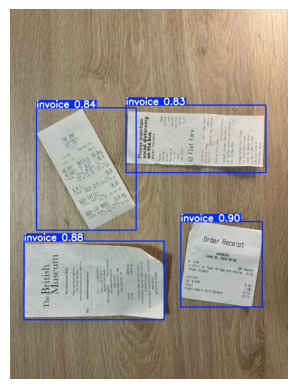

In [ ]:
# Load the model
model = YOLO('/content/drive/MyDrive/Yolov9_runs/runs_100epochs-3-fold/train222/detect/train/weights/best.pt')

# Predict with the model
results1 = model('/content/drive/MyDrive/Test photos/inv_scenarios.jpg',conf=0.5)  # predict on an image

# Process the results (e.g., bounding boxes, masks, keypoints, etc.)
for result in results1:
    boxes = result.boxes
    masks = result.masks
    keypoints = result.keypoints
    probs = result.probs
    obb = result.obb
    result.show()  # Display the result
    result.save(filename='result.jpg')  # Save the result to disk

# Load the saved image
result_image = cv2.imread('result.jpg')
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Display the image using matplotlib
plt.imshow(result_image)
plt.axis('off')  # Hide the axis
plt.show()